In [44]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import ElasticNet

In [45]:
data = np.loadtxt('../content/features.csv',delimiter=',', skiprows=1) # skip row for column names

In [46]:
np.shape(data)

(124, 15)

In [47]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

## **Discharge Model**

In [36]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]

regressor = ElasticNet()

In [48]:
# Create the random grid
param_grid = { 'l1_ratio': np.linspace(0,1,10000),
              }
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(l1_ratio=0.0037003700370037006),
                   n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)
Fitting 4 folds for each of 10000 candidates, totalling 40

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10000 is smaller than n_iter=20000. Running 10000 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.828e-01, tolerance: 1.070e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(l1_ratio=0.0037003700370037006),
                   n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [9]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"])

In [10]:
regressor.fit(x_train,y_train)

ElasticNet(l1_ratio=1.0)

### **Metric Evaluation**

In [11]:
np.sqrt(np.mean((regressor.predict(x_test)-y_test)**2))

162.76587705783226

In [12]:
np.sqrt(np.mean((regressor.predict(x_stest)-y_stest)**2))

197.39365048416727

In [13]:
np.mean((np.abs(regressor.predict(x_train)-y_train))/y_train)

0.21006002955255068

In [14]:
np.mean((np.abs(regressor.predict(x_test)-y_test))/y_test)

0.20599888060138916

In [15]:
np.mean((np.abs(regressor.predict(x_stest)-y_stest))/y_stest)

0.12831217801626765

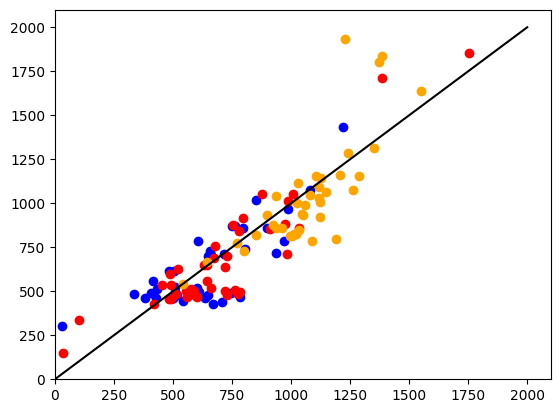

In [16]:
fig,ax=plt.subplots()
ax.scatter(regressor.predict(x_train),y_train,c="blue")
ax.scatter(regressor.predict(x_test),y_test,c="red")
ax.scatter(regressor.predict(x_stest),y_stest,c="orange")
ax.set_xlim([0,2100])
ax.set_ylim([0,2100])
ax.plot(np.linspace(0,2000),np.linspace(0,2000),color='black')

## **Improvement Discharge Model**

In [40]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [64]:
# Create the random grid
regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-7, 0, 1000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-7, 0, 10000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring="neg_mean_squared_error",
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)
print(model)
model.fit(x_train, (y_train))

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-07, 1.01626509e-07, 1.03279473e-07, 1.04959323e-07,
       1.06666496e-07, 1.08401436e-07, 1.10164595e-07, 1.11956432e-07,
       1.13777413e-07, 1.15628013e-07, 1.17508713e-07, 1.19420003e-07,
       1.21362380e-07, 1.23...
       8.37380654e-01, 8.51000725e-01, 8.64842328e-01, 8.78909065e-01,
       8.93204600e-01, 9.07732653e-01,

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-07, 1.01626509e-07, 1.03279473e-07, 1.04959323e-07,
       1.06666496e-07, 1.08401436e-07, 1.10164595e-07, 1.11956432e-07,
       1.13777413e-07, 1.15628013e-07, 1.17508713e-07, 1.19420003e-07,
       1.21362380e-07, 1.23...
       8.37380654e-01, 8.51000725e-01, 8.64842328e-01, 8.78909065e-01,
       8.93204600e-01, 9.07732653e-01, 9.22497005e-01, 9.37501502e-01,
       9.52750047e-01, 9.68246612e-01, 9.83995230e-01, 1.00000000e+00]),
                                        'l1_ratio': array([1.00000000e-07, 1.00161327e-07, 1.00322914e-07, ...,
       9.96781250e-01, 9.98389328e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [65]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])

In [66]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=2.287490817355704e-06, l1_ratio=1.8126995735709857e-07)

In [67]:
print("RMSE on Train Data: ", np.sqrt(np.mean(np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2))

RMSE on Train Data:  5.229434627705888


In [68]:
print("RMSE on Primary Test: ", np.sqrt(np.mean(np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2))
# 1 is the best score

RMSE on Primary Test:  39.92703732588658


In [69]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean(np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2))
# 1 is the best score

RMSE on Secondary Test:  143.08397048224703


In [63]:
regressor.coef_

array([-0.42379179, -0.80794901, -0.05670907,  0.00258381, -0.64175432,
        1.33445528, -0.01477699,  1.10621366, -0.00894969,  0.61408037])

## **Full Model**

In [70]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [113]:
regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-2.5, 0, 1000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-2, 0, 10000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring="neg_mean_squared_error",
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)

model.fit(x_train, y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
Fitting 4 folds for each of 20000 candidates, totalling 80000 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([0.00316228, 0.00318055, 0.00319893, 0.00321742, 0.00323601,
       0.00325471, 0.00327352, 0.00329244, 0.00331146, 0.0033306 ,
       0.00334985, 0.00336921, 0.00338868, 0.00340826, 0.00342795,
       0.00344776, 0.00346769, 0.00348773, 0....
       0.89629805, 0.90147763, 0.90668714, 0.91192676, 0.91719666,
       0.92249701, 0.92782798, 0.93318977, 0.93858254, 0.94400648,
       0.94946176, 0.95494856, 0.96046708, 0.96601748, 0.97159996,
       0.9772147 , 0.98286188, 0.9885417 , 0.99425434, 1.        ]),
                                        'l1_ratio': array([0.01      , 0.01000461, 0.01000922, ..., 0.9990793 , 0.99953954,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [114]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])

In [115]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=0.0031622776601683794, l1_ratio=0.6257194256105496)

In [116]:
print("RMSE on Train Data: ", np.sqrt(np.mean(np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2))

RMSE on Train Data:  13.049046685381931


In [117]:
print("RMSE on Primary Test: ", np.sqrt(np.mean(np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2))


RMSE on Primary Test:  12.015562533724285


In [118]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean(np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2))

RMSE on Secondary Test:  225.0455244647169


## **Variance Model**